In [9]:
1.1

1.1

list- изменяемы тип, tuple - нет
dict в питоне реализован через хэш таблицу, так что от ключа нужно брать хэш, поэтому только неизменяемый tuple можно использовать в качестве ключа.
set (frozenset) изменыемое(неизменяемое) множество уникальных неизменяемых элементов, т.е. тоже не может включать list ( при изменении будет меняться hash)
range создает и хранит в памяти list всех сгенерированых элементов, xrange - это итератор, который хранит только один элемент в памяти и правило перехода к следующему 
map(function_to_apply, list_of_inputs) - позволяет применить кукую-то функцию  ко всем элементам в списке 
пример: list(map( lambda x: x**2, list(range(5)) ))
reduce((lambda x, y: x * y), [1, 2, 3, 4]) - y - здесь  аккумулятор, x текущее значение из коллекции, позволяет применять какую-то функцию ко всем элементам колекции и комбинировать результат каждого применения

In [10]:
1.2

1.2

In [19]:
def fib( N : int ):
    if N == 1 or N == 0:
        return 1
    return fib( N - 1 ) + fib( N - 2 )

In [20]:
import numpy as np

def fib_fast( N ):
    M = [[1,1],[1,0]]
    M = np.linalg.matrix_power(M, N)
    return( np.dot(M,[1,1])[1])

In [21]:
import time
from datetime import timedelta

def dif_time(N:int, fun):
    start_time = time.monotonic()
    print(fun(N))
    end_time = time.monotonic()
    print(timedelta(seconds=end_time - start_time))

In [22]:
1.3

1.3

In [23]:
dif_time(5, fib_fast)
dif_time(40, fib_fast)
dif_time(5,fib)
dif_time(40,fib)




8
0:00:00
165580141
0:00:00
8
0:00:00
165580141
0:01:05.281000


In [24]:
import sys
sys.setrecursionlimit(1500)

print(fib(1))

1


In [25]:
1.4 1.5

SyntaxError: invalid syntax (<ipython-input-25-b5600c4a41d5>, line 1)

In [28]:
import math

def getArg( re, im ):
    if re==0 and im==0:
        return None
    if re==0:
        return math.pi/2
    return math.atan(im/re)

def getMod( re, im ):
    return (re**2 + im**2)**0.5

"""
Это модуль-пример.

Этот модуль предоставляет одну функцию - getArgAndMod().  Например,

>>> getArgAndMod(0, 0)
(0, None)
"""            

def getArgAndMod( re, im ):
    
    """Возвращает модуль и аргумент комплексного числа в tuple
    причем нулевому индексу соответсвует аргумент

    Если im = 0, re = 0 то возращает (None, 0)

    >>> [getArgAndMod(*n) for n in [[0,0], [2**0.5, 2**0.5], [0,1], [1, 0]]]
    [(None, 0.0), (0.7853981633974483, 2.0), (1.5707963267948966, 1.0), (0.0, 1.0)]
    """
    return getArg( re, im ), getMod( re, im ) 

import doctest
doctest.run_docstring_examples(getArgAndMod, globals())

print(type(getArgAndMod(2,2)))

<class 'tuple'>


1.6 1.9

In [60]:
class complex_number:
    def __init__(self, Re, Im):
        self.re = Re
        self.im = Im
    
""""    
    @property
    def Re(self):
        return self.__Re
    
    @Re.setter
    def real(self, value):
        if isinstance(value, int):
            self.__real = float(value)
        elif isinstance(value, float):
            self.__real = int(value)
        else:
            raise TypeError("wrong type for complex number field")  
"""
    
    def getArg(self):
        return getArg(self.re, self.im )
    
    def getMod(self):
        return getMod(self.re, self.im )
    
    def __str__(self):
        return "re = {}, im = {}, arg = {}, mod = {}".format(self.re, self.im, self.getArg(), self.getMod())
    
    def setRe(self, newRe):
        self.re = newRe
        
    def setIm(self, newIm):
        self.im = newIm
        
    def setArg(self, newArg):
        newRe = self.getMod()*math.cos(newArg)
        newIm = self.getMod()*math.sin(newArg)
        self.setRe(newRe)
        self.setIm(newIm)
    
    def __add__(self, another_complex):
        return complex_number(self.Re + another_complex.Re, self.Im + another_complex.Im)
    
    def __mul__(self, another_complex):
        x = self.Re*another_complex.Re - self.Im*another_complex.Im
        y = self.Im*another_complex.Re + self.Re*another_complex.Im
        return complex_number(x, y)
           

In [61]:
z = complex_number(1,1)
print(z.getMod())
print(z)
z.setArg(0)
print(z)

1.4142135623730951
re = 1, im = 1, arg = 0.7853981633974483, mod = 1.4142135623730951


AttributeError: 'complex_number' object has no attribute 'setRe'

In [31]:
1.7

1.7

In [32]:
def timer(f):
    import time
    def tmp(*args, **kwargs):
        t = time.time()
        res = f(*args, **kwargs)
        print("Время выполнения функции %s: %f" % (str(f), (time.time()-t)))
        return res

    return tmp



In [33]:
def memoized(f):
    memory = {}
    
    def wrapper(*args, **kwargs):
        key = (tuple(args), hash(tuple(sorted(kwargs.items()))))
        if not key in memory:
            memory[key] = f(*args, **kwargs)
        return memory[key]
    
    return wrapper

In [34]:
@memoized
@timer
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [35]:
fib(30)

Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0.000000
Время выполнения функции <function fib at 0x00000209B8B3A950>: 0

1346269

In [36]:
fib(30)

1346269

In [37]:
@timer
@memoized
def fib(n):
    if n == 0 or n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

In [38]:
fib(30)

Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000998
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000998
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000998
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000998
Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000000
Время выполнения функции <function memoized.<locals>.wrapper

1346269

In [39]:
fib(30)

Время выполнения функции <function memoized.<locals>.wrapper at 0x00000209B8B61268>: 0.000000


1346269

In [ ]:
import matplotlib as plt


In [ ]:
1.8. self.x и @property
# проперти можно напрямую читать, но не изменять
#( можно изменить только косвенно), а поле класса можно как изменять так и читать

In [57]:
class ExampeClass(object):
    def __init__(self):
        self.x = 0
        self.y = 1
        
    @property    
    def unchangableProp(self):
        return 2
    
    @property    
    def changableProp(self):
        return self.x + self.y

In [58]:
a = ExampeClass()
print("a.x = {0}, a.y = {1}, a.unchangableProp = {2}, a.changableProp = {3}".
format(a.x, a.y, a.unchangableProp, a.changableProp))
a.x = 5
a.y = 10
print("a.x = {0}, a.y = {1}, a.unchangableProp = {2}, a.changableProp = {3}".
      format(a.x, a.y, a.unchangableProp, a.changableProp))

a.unchangableProp = 20 # нельзя изменить напрямую

a.x = 0, a.y = 1, a.unchangableProp = 2, a.changableProp = 1
a.x = 5, a.y = 10, a.unchangableProp = 2, a.changableProp = 15


AttributeError: can't set attribute

In [ ]:
# 2. Requests/urlib + BeautifulSoup

In [62]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

URL = "https://www.bbc.com/news/world-europe-46425777"
page = urlopen(URL)
soup = BeautifulSoup(page, "html.parser")

article_title = soup.find("p", attrs={"class": "story-body__introduction"})
article_body = soup.findAll("p", attrs={"class": None, "style": None})

article = article_title.text.strip() + "\n\n" 

for paragraph in article_body:
    article += (paragraph.text.strip() + "\n\n")
    
print(article)

Does crisis beckon in the Black Sea? Could Russia and Nato even come to blows?

That - at least for now - is probably unlikely. But the recent seizure of two Ukrainian gunboats and a tug in the approaches to the Kerch Strait, by vessels of the Russian Border Guard, has inevitably brought security in the Black Sea to the forefront of Nato's agenda at their meeting in Brussels on Tuesday.

The Black Sea has long had strategic significance.

It was, after all, the theatre for a major conflict between the Western powers France and Great Britain and Imperial Russia in the mid-19th Century. During the Cold War, it was the Soviet Union's shortest route to Iran and the Middle East. Turkey - a Nato ally - stood astride the Black Sea's southern exit to the Mediterranean, facing Russia across the Black Sea to its the north.

For the Russians this was always seen as their "back yard". And the end of the Cold War and the break-up of the Soviet Union greatly complicated relationships.

Russia has en

In [64]:
 # 3. Numpy 

In [ ]:
3.1

In [68]:
import numpy as np
zeros = np.zeros((3, 4, 2), dtype="int")
print(zeros)

zeros[0,:,:] = np.array([[1, 2],[3, 4],[5, 6],[7, 8]])
zeros[1,:,:] = np.array([[10, 20],[30, 40],[50, 60],[70, 80]])
zeros[:,3,1] = np.array([8, 80, 0])
print(zeros)

[[[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]

 [[0 0]
  [0 0]
  [0 0]
  [0 0]]]
[[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]]

 [[10 20]
  [30 40]
  [50 60]
  [70 80]]

 [[ 0  0]
  [ 0  0]
  [ 0  0]
  [ 0  0]]]


In [93]:
print ("Первые две матрицы\n",zeros[0:2,:,:]) 
print ("первый элемент\n",zeros[:1,:1,0]) 
print("Выбиратет элемет [0,0,0], [1,1,1] \n", zeros[(0, 1),(0, 1),(0, 1)] )  
print("Выбиратет элемет [0,0,:], [1,1,:] \n", zeros[(0, 1),(0, 1)] )
print("Выбиратет элемет [2,3,1] \n", zeros[2][3][1] )

Первые две матрицы
 [[[ 1  2]
  [ 3  4]
  [ 5  6]
  [ 7  8]]

 [[10 20]
  [30 40]
  [50 60]
  [70 80]]]
первый элемент
 [[1]]
Выбиратет элемет [0,0,0], [1,1,1] 
 [ 1 40]
Выбиратет элемет [0,0,:], [1,1,:] 
 [[ 1  2]
 [30 40]]
Выбиратет элемет [2,3,1] 
 0


In [ ]:
# 3.2 Сравнение производительности np.array и list

In [94]:
a = [1.0]*10000
b = [2.0]*10000
a1 = np.array(a)
b1 = np.array(b)

In [95]:
%%timeit
c = [x * y for x, y in zip(a,b)]

855 µs ± 50.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [96]:
%%timeit
c = a1 * b1

10.1 µs ± 636 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [97]:
%%timeit
c = [x * y for x, y in zip(a1, b1)]

3.02 ms ± 101 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# 3.3 numpy.linspace()

In [102]:
def linspace(start, stop, num=50):
    step = (stop - start)/(num-1)
    return [start + step*i for i in range(num)]

print(linspace(0, 1, 11))
print(np.linspace(0, 1, 11))

[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [107]:
%%timeit
a = linspace(0, 1, 1000000)

257 ms ± 8.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [108]:
%%timeit
b = np.linspace(0, 1, 1000000)

9.94 ms ± 119 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
# 4. Matplotlib 

In [ ]:
4.1

In [ ]:
#%matplotlib inline это magic-функция IPython, которая настраивает корректную работу matplotlib с IPython. 
#%matplotlib задает вывод команд отрисовки в отдельное окно
#%matplotlib inline позволяет направить вывод в ячейку и отрисовывать и хранить график там.

In [110]:
4.2

4.2

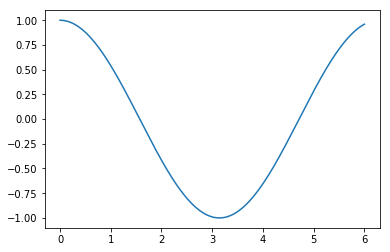

In [112]:
import numpy as np
import math

%matplotlib inline
import matplotlib.pyplot as plt

X = np.linspace(0, 6, 500)
Y = [math.cos(x) for x in X]

plt.plot(X, Y);

Populating the interactive namespace from numpy and matplotlib


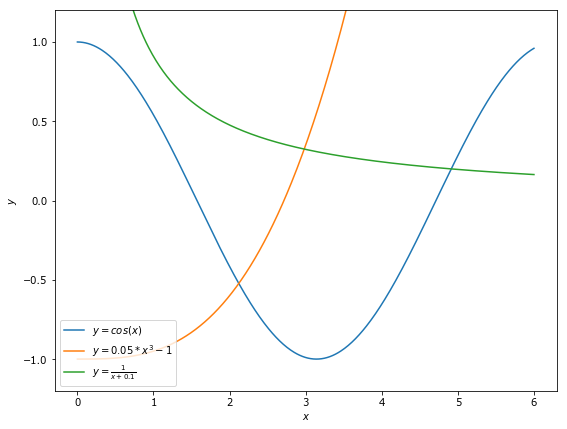

In [115]:
import matplotlib.pylab as plt
%pylab inline

import matplotlib as mpl
import warnings

warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = 9, 7
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rc('font', weight='bold')
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10)
# чтобы был русский шрифт
from matplotlib import rc
font = {'family': 'Verdana',
        'weight': 'normal'}
rc('font', **font)

X = np.linspace(0, 6, 500)
Y = [math.cos(x) for x in X]
Y1 = [0.05*x**3 - 1 for x in X]
Y2 = [1/(x + 0.1) for x in X]
plt.ylim(-1.2, 1.2)
plt.plot(X, Y, label="$y = cos(x)$")
plt.plot(X, Y1, label="$y = 0.05*x^3 - 1$")
plt.plot(X, Y2, label="$y = \\frac{1}{x + 0.1}$")
plt.legend(loc="lower left")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.savefig('charts.png')
plt.show()

In [ ]:
# 4. 4 

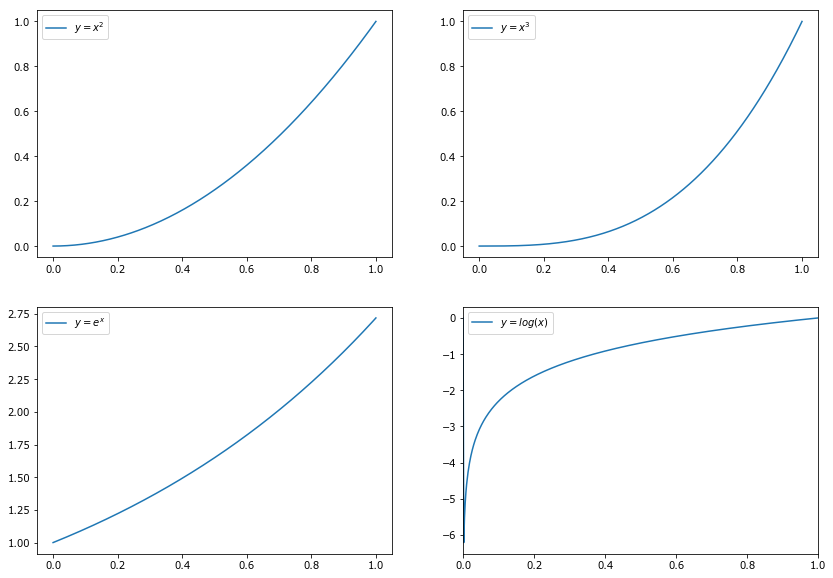

In [116]:
plt.rcParams['figure.figsize'] = 14, 10

X = np.linspace(0, 1, 500)

Y1 = [x**2 for x in X]
plt.subplot(221)
plt.plot(X, Y1, label="$y = x^2$")
plt.legend()

Y2 = [x**3 for x in X]
plt.subplot(222)
plt.plot(X, Y2, label="$y = x^3$")
plt.legend()

Y3 = [math.exp(x) for x in X]
plt.subplot(223)
plt.plot(X, Y3, label="$y = e^x$")
plt.legend()

Y4 = [math.log(x) if x > 0 else 0 for x in X]
plt.subplot(224)
plt.plot(X, Y4, label="$y = log(x)$")
plt.legend()

plt.xlim(0, 1)
plt.plot()
plt.legend()

In [ ]:
# 5. Heatmap 

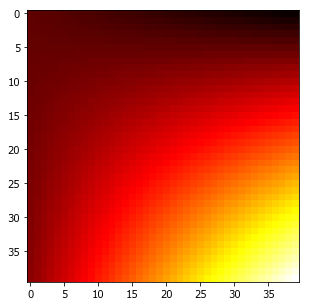

In [118]:
def f(x, y):
    return 3*x*y + x - 2*y

num = 40
delta = 5/num
X = np.linspace(0, 5, num)
Y = np.linspace(0, 5, num)
Z = np.empty([num, num], dtype="float")
for i in range(num):
    for j in range(num):
        x = i * delta
        y = j * delta
        Z[i, j] = f(x, y)
        
plt.rcParams['figure.figsize'] = 5, 5
plt.imshow(Z, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
4.6

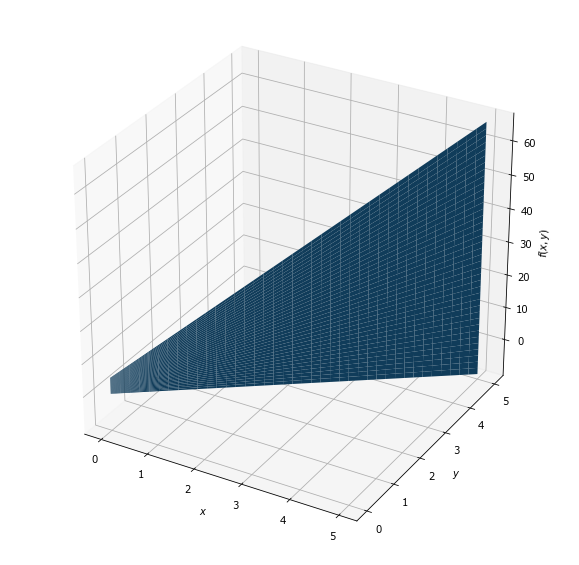

In [120]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection = '3d')

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$f(x, y)$')
plt.show()

In [138]:
type(A)

numpy.ndarray

In [134]:
A = np.random.random_sample(500) * 100

In [145]:
B = [ x**3 + 2 * x**2 - 3 * x + 2 for x in A ] 

In [150]:
C = np.array([A,B])

(2, 500)